In [1]:
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle as pickle

Check numpy and scipy

The code will run faster for $z > 1$ if you use these see also the `README.md`:

`/afs/ifh.de/group/that/work-jh/git/scipy/scipy/`  
`/afs/ifh.de/group/that/work-jh/git/numpy/numpy/`

In [2]:
import inspect
print(inspect.getmodule(sc))
print(inspect.getmodule(np))

<module 'scipy' from '/home/jheinze/programme/anaconda3/lib/python3.7/site-packages/scipy/__init__.py'>
<module 'numpy' from '/home/jheinze/programme/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>


In [3]:
import prince_config
from prince import core, util, photonfields, cross_sections
from prince import util as pru

# General Information

This Notebook contains reproductions of results from arXiv:1508.01824  
Specifically these are propagated spectra for different cross sections and photon fields  
**Note:** This notebook contains little documentation, for details see  
`examples/Create_Kernel.ipynb` and `examples/Propagate_single_spectrum.ipynb`

# Setup and save prince_run objects

Setup and save Kernels for different cross sections  
Analogous to `examples/Create_Kernel.ipynb`

In [4]:
%%time
pf = photonfields.CombinedPhotonField(
                [photonfields.CMBPhotonSpectrum, 
                 photonfields.CIBGilmore2D])
cs = cross_sections.CompositeCrossSection([(0., cross_sections.TabulatedCrossSection, ('CRP2_TALYS',)),
                                           (0.14, cross_sections.SophiaSuperposition, ())])
prince_run_talys = core.PriNCeRun(max_mass = 56, photon_field=pf, cross_sections=cs)

CompositeCrossSection::_join_models(): Attempt to join 2 models.
TabulatedCrossSection::_load(): Load tabulated cross sections
TabulatedCrossSection::_load(): Egrid loading finished
TabulatedCrossSection::_load(): Data file loading finished
TabulatedCrossSection::set_range(): Setting range to 1.00e-06 - 2.00e-01
TabulatedCrossSection::set_range(): Range set to 1.00e-06 - 2.00e-01
TabulatedCrossSection::_load(): Finished initialization
TabulatedCrossSection::_reduce_channels(): Integrating out species with lifetime smaller than inf
TabulatedCrossSection::_reduce_channels(): Before optimization, the number of known primaries is 466 with in total 43517 inclusive channels
SophiaSuperposition::_load(): Loading SOPHIA cross sections from file.
SophiaSuperposition::set_range(): Setting range to 1.58e-01 - 1.00e+08
SophiaSuperposition::set_range(): Range set to 1.58e-01 - 1.00e+08


/home/jheinze/python_packages/PriNCe/prince/decays.py:527: RuntimeWarning: invalid value encountered in sqrt
  (E_mesh - Emax)**2 - boost**2 * mass_el**2)


TabulatedCrossSection::_reduce_channels(): After optimization, the number of known primaries is 84 with in total 3272 inclusive channels
TabulatedCrossSection::set_range(): Setting range to 0.00e+00 - 1.40e-01
TabulatedCrossSection::set_range(): Range set to 1.00e-06 - 1.40e-01
SophiaSuperposition::_load(): Loading SOPHIA cross sections from file.
SophiaSuperposition::set_range(): Setting range to 1.58e-01 - 1.00e+08
SophiaSuperposition::set_range(): Range set to 1.58e-01 - 1.00e+08
SophiaSuperposition::set_range(): Setting range to 1.40e-01 - 1.00e+08
SophiaSuperposition::set_range(): Range set to 1.58e-01 - 1.00e+08
CompositeCrossSection::set_range(): Setting range to 1.00e-06 - 1.00e+08
CompositeCrossSection::set_range(): Range set to 1.00e-06 - 1.00e+08
CompositeCrossSection::_reduce_channels(): Integrating out species with lifetime smaller than inf
CompositeCrossSection::_reduce_channels(): Before optimization, the number of known primaries is 84 with in total 2809 inclusive chann

In [5]:
%%time
import os
lustre = os.path.expanduser("~/data/prince_kernels/")
with open(lustre + 'prince_run_talys_new.ppo','wb') as thefile:
    pickle.dump(prince_run_talys, thefile, protocol = -1)

CPU times: user 1.92 s, sys: 15.7 s, total: 17.6 s
Wall time: 19.9 s


In [6]:
%%time
pf = photonfields.CombinedPhotonField(
                [photonfields.CMBPhotonSpectrum, 
                 photonfields.CIBGilmore2D])
cs = cross_sections.CompositeCrossSection([(0., cross_sections.TabulatedCrossSection, ('peanut_IAS',)),
                                           (0.14, cross_sections.SophiaSuperposition, ())])
prince_run_peanut = core.PriNCeRun(max_mass = 56, photon_field=pf, cross_sections=cs)

CompositeCrossSection::_join_models(): Attempt to join 2 models.
TabulatedCrossSection::_load(): Load tabulated cross sections
load_or_convert_array(): Converting peanut_IAS_egrid to '.npy'
TabulatedCrossSection::_load(): Egrid loading finished
load_or_convert_array(): Converting peanut_IAS_nonel to '.npy'
load_or_convert_array(): Converting peanut_IAS_incl_i_j to '.npy'
TabulatedCrossSection::_load(): Data file loading finished
TabulatedCrossSection::set_range(): Setting range to 1.00e-03 - 1.00e+00
TabulatedCrossSection::set_range(): Range set to 1.00e-03 - 1.00e+00
TabulatedCrossSection::_load(): Finished initialization
TabulatedCrossSection::_reduce_channels(): Integrating out species with lifetime smaller than inf
TabulatedCrossSection::_reduce_channels(): Before optimization, the number of known primaries is 364 with in total 40671 inclusive channels
SophiaSuperposition::_load(): Loading SOPHIA cross sections from file.
SophiaSuperposition::set_range(): Setting range to 1.58e-01 

In [7]:
%%time
lustre = os.path.expanduser("~/data/prince_kernels/")
with open(lustre + 'prince_run_peanut_new.ppo','wb') as thefile:
    pickle.dump(prince_run_peanut, thefile, protocol = -1)

CPU times: user 1.06 s, sys: 3.36 s, total: 4.42 s
Wall time: 5.6 s


In [8]:
%%time
pf = photonfields.CombinedPhotonField(
                [photonfields.CMBPhotonSpectrum, 
                 photonfields.CIBGilmore2D])
cs = cross_sections.CompositeCrossSection([(0., cross_sections.NEUCOSMACrossSection, ()),
                                           (0.14, cross_sections.SophiaSuperposition, ())])
prince_run_PSB = core.PriNCeRun(max_mass = 56, photon_field=pf, cross_sections=cs)

CompositeCrossSection::_join_models(): Attempt to join 2 models.
known species after loading NeuCosmA file:
[ 100  101  201  302  402  904 1005 1105 1206 1306 1407 1507 1608 1708
 1808 1909 2010 2110 2210 2311 2412 2512 2612 2713 2814 2914 3014 3115
 3216 3316 3416 3517 3618 3718 3818 3919 4019 4119 4220 4320 4420 4521
 4622 4722 4822 4922 5023 5123 5224 5324 5424 5525 5626]
NEUCOSMACrossSection::set_range(): Setting range to 3.16e-04 - 1.00e+00
NEUCOSMACrossSection::set_range(): Range set to 3.16e-04 - 1.00e+00
NEUCOSMACrossSection::_reduce_channels(): Integrating out species with lifetime smaller than inf
NEUCOSMACrossSection::_reduce_channels(): Before optimization, the number of known primaries is 53 with in total 683 inclusive channels
SophiaSuperposition::_load(): Loading SOPHIA cross sections from file.
SophiaSuperposition::set_range(): Setting range to 1.58e-01 - 1.00e+08
SophiaSuperposition::set_range(): Range set to 1.58e-01 - 1.00e+08
NEUCOSMACrossSection::_reduce_channels()

In [9]:
%%time
import os

lustre = os.path.expanduser("~/data/prince_kernels/")
with open(lustre + 'prince_run_PSB_new2.ppo','wb') as thefile:
    pickle.dump(prince_run_PSB, thefile, protocol = -1)

CPU times: user 578 ms, sys: 1.81 s, total: 2.39 s
Wall time: 2.85 s


# Load a model

In [10]:
import os

In [11]:
from prince.solvers import UHECRPropagationSolver
from prince.cr_sources import SimpleSource, AugerFitSource, RigdityCutoffSource

In [12]:
%%time
lustre = os.path.expanduser("~/data/prince_kernels/")
with open(lustre + 'prince_run_talys_new.ppo','rb') as thefile:
    prince_run_talys = pickle.load(thefile)

CPU times: user 938 ms, sys: 8.45 s, total: 9.39 s
Wall time: 11.1 s


In [13]:
%%time
lustre = os.path.expanduser("~/data/prince_kernels/")
with open(lustre + 'prince_run_peanut_new.ppo','rb') as thefile:
    prince_run_peanut = pickle.load(thefile)

CPU times: user 781 ms, sys: 8.66 s, total: 9.44 s
Wall time: 10.6 s


In [14]:
%%time
lustre = os.path.expanduser("~/data/prince_kernels/")
with open(lustre + 'prince_run_PSB_new2.ppo','rb') as thefile:
    prince_run_PSB = pickle.load(thefile)

CPU times: user 344 ms, sys: 33.7 s, total: 34 s
Wall time: 34.5 s


# Different EBL Models

In [15]:
from prince.cr_sources import RigdityCutoffSource

In [16]:
source_hard_iron = RigdityCutoffSource(prince_run_PSB, params={5626:(1.0, 5e9,  1.0)}, norm=1e-87)
source_soft_iron = RigdityCutoffSource(prince_run_PSB, params={5626:(2.0, 1e11, 1.0)}, norm=1e-87)
source_hard_nitro = RigdityCutoffSource(prince_run_PSB, params={1407:(1.0, 5e9,  1.0)}, norm=1e-87)
source_soft_nitro = RigdityCutoffSource(prince_run_PSB, params={1407:(2.0, 1e11, 1.0)}, norm=1e-87)

In [17]:
pf_gilmore = photonfields.CombinedPhotonField(
    [photonfields.CMBPhotonSpectrum,photonfields.CIBGilmore2D])

pf_dominguez = photonfields.CombinedPhotonField(
    [photonfields.CMBPhotonSpectrum,photonfields.CIBDominguez2D])

pf_inoue = photonfields.CombinedPhotonField(
    [photonfields.CMBPhotonSpectrum,photonfields.CIBInoue2D])

pf_franc = photonfields.CombinedPhotonField(
    [photonfields.CMBPhotonSpectrum,photonfields.CIBFranceschini2D])

/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/hom

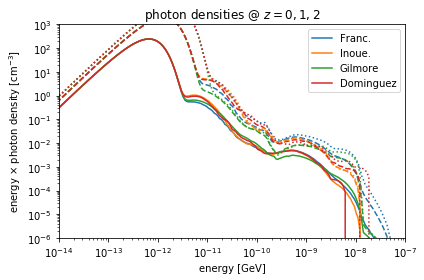

In [18]:
fig, (ax1) = plt.subplots(1, figsize = (6,4))

eplot = np.logspace(-18, -7, 300)

plt.loglog(eplot, eplot * pf_gilmore.get_photon_density(eplot, 0.), label = 'Franc.')
plt.loglog(eplot, eplot * pf_dominguez.get_photon_density(eplot, 0.), label = 'Inoue.')
plt.loglog(eplot, eplot * pf_inoue.get_photon_density(eplot, 0.), label = 'Gilmore')
plt.loglog(eplot, eplot * pf_franc.get_photon_density(eplot, 0.), label = 'Dominguez')

plt.gca().set_prop_cycle(None)
plt.loglog(eplot, eplot * pf_gilmore.get_photon_density(eplot, 1.), ls = 'dashed')
plt.loglog(eplot, eplot * pf_dominguez.get_photon_density(eplot, 1.), ls = 'dashed')
plt.loglog(eplot, eplot * pf_inoue.get_photon_density(eplot, 1.), ls = 'dashed')
plt.loglog(eplot, eplot * pf_franc.get_photon_density(eplot, 1.), ls = 'dashed')

plt.gca().set_prop_cycle(None)
plt.loglog(eplot, eplot * pf_gilmore.get_photon_density(eplot, 2.), ls = 'dotted')
plt.loglog(eplot, eplot * pf_dominguez.get_photon_density(eplot, 2.), ls = 'dotted')
plt.loglog(eplot, eplot * pf_inoue.get_photon_density(eplot, 2.), ls = 'dotted')
plt.loglog(eplot, eplot * pf_franc.get_photon_density(eplot, 2.), ls = 'dotted')

plt.xlim(1e-14,1e-7)
plt.ylim(1e-6,1e3)

plt.title('photon densities @ $z = 0, 1, 2$')
plt.xlabel('energy [GeV]')
plt.ylabel(r'energy $ \times $ photon density [cm$^{-3}$]')
plt.legend()

plt.tight_layout()

### Hard iron

In [19]:
from prince.solvers import UHECRPropagationSolverBDF

In [20]:
prince_run = prince_run_PSB

In [21]:
prince_run.int_rates.photon_field = pf_gilmore

solver_gilmore = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_gilmore.add_source_class(source_hard_iron)
solver_gilmore.solve(dz=1e-3,verbose=False,full_reset=False,progressbar='notebook')

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 4.074589729309082 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)



UHECRPropagationSolverBDF::solve(): Integration completed in 32.02582335472107 s


In [22]:
prince_run.int_rates.photon_field = pf_dominguez

solver_dominguez = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_dominguez.add_source_class(source_hard_iron)
solver_dominguez.solve(dz=1e-3,verbose=False,full_reset=False,progressbar='notebook')

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 4.959062814712524 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)



UHECRPropagationSolverBDF::solve(): Integration completed in 36.040393352508545 s


In [23]:
prince_run.int_rates.photon_field = pf_franc

solver_franc = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_franc.add_source_class(source_hard_iron)
solver_franc.solve(dz=1e-3,verbose=False,full_reset=False,progressbar='notebook')

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 4.8312249183654785 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)



UHECRPropagationSolverBDF::solve(): Integration completed in 35.91669988632202 s


In [24]:
prince_run.int_rates.photon_field = pf_inoue

solver_inoue = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_inoue.add_source_class(source_hard_iron)
solver_inoue.solve(dz=1e-3,verbose=False,full_reset=False,progressbar='notebook')

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 4.9618589878082275 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)



UHECRPropagationSolverBDF::solve(): Integration completed in 37.05912804603577 s


/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value 

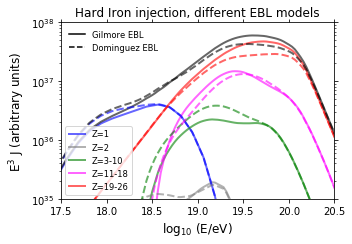

In [26]:
from prince.util import get_AZN, PRINCE_UNITS
plt.figure(figsize=(5,3.5))

z = lambda el: get_AZN(el)[1]
energy, spectrum = solver_gilmore.res.get_solution_group(
    [el for el in solver_gilmore.known_species[::] if el >= 200])
norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
alpha = .6

for eg, ls in zip([solver_gilmore,solver_dominguez],['solid','dashed', 'dotted', '-.']):
    
#     energy, spectrum = eg.get_solution_group(
#         [el for el in eg.prince_run.spec_man.known_species[::] if el >= 200])
#     norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
    
    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.known_species[::] if z(el) == 1 and el >= 100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=1', c='b')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.known_species[::] if z(el) == 2 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=2', c='grey')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.known_species[::] if 3 <= z(el) <= 10 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=3-10', c='g')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if 11 <= z(el) <= 18 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=11-18',c='magenta')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if 19 <= z(el) <= 26 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=19-26',c='r')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::]  if el >= 100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, c='k')


#custom legend
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
display = (0,1,2,3,4)

#Create custom artists
legend_gilmore = plt.Line2D((0,1),(0,0), color='k', linestyle='solid')
legend_dominguez = plt.Line2D((0,1),(0,0), color='k', linestyle='dashed')

#Create legend from custom artist/label lists
# ax.legend([handle for i,handle in enumerate(handles) if i in display]+[legend_gilmore,legend_dominguez],
#           [label for i,label in enumerate(labels) if i in display]+['Gilmore EBL', 'Dominguez EBL'])
# ax.legend([handle for i,handle in enumerate(handles) if i in display],
#           [label for i,label in enumerate(labels) if i in display])
leg2 =  ax.legend([handle for i,handle in enumerate(handles) if i in display],
           [label for i,label in enumerate(labels) if i in display],
                  ncol = 1, loc = 'lower left', fontsize = 'small')
ax.legend([legend_gilmore,legend_dominguez],['Gilmore EBL', 'Dominguez EBL'], 
          frameon=False, fontsize = 'small')
ax.add_artist(leg2)

plt.semilogy()
# plt.legend(ncol=1, loc='upper left')
plt.tick_params(axis='both',top=True,right=True,which='both')
plt.xlim(17.5,20.5)
plt.ylim(1e35,1e38)
# plt.grid()
plt.ylabel('E$^3$ J (arbitrary units)', fontsize = 'large')
plt.xlabel('log$_{10}$ (E/eV)', fontsize = 'large')
plt.title('Hard Iron injection, different EBL models')
plt.tight_layout()

### Soft iron

In [27]:
prince_run.int_rates.photon_field = pf_gilmore

solver_gilmore = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_gilmore.add_source_class(source_soft_iron)
solver_gilmore.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 3.219043016433716 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 22.761226415634155 s


In [28]:
prince_run.int_rates.photon_field = pf_dominguez

solver_dominguez = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_dominguez.add_source_class(source_soft_iron)
solver_dominguez.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 3.383878231048584 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 24.000822067260742 s


In [29]:
prince_run.int_rates.photon_field = pf_franc

solver_franc = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_franc.add_source_class(source_soft_iron)
solver_franc.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 3.0977401733398438 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 22.422011613845825 s


In [30]:
prince_run.int_rates.photon_field = pf_inoue

solver_inoue = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_inoue.add_source_class(source_soft_iron)
solver_inoue.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 3.145150661468506 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 21.862921953201294 s


/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value 

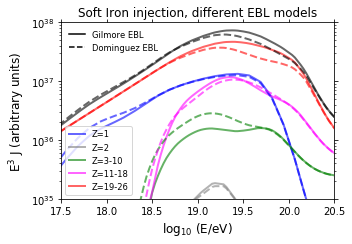

In [32]:
from prince.util import get_AZN, PRINCE_UNITS
plt.figure(figsize=(5,3.5))

z = lambda el: get_AZN(el)[1]
energy, spectrum = solver_gilmore.res.get_solution_group(
    [el for el in solver_gilmore.known_species[::] if el >= 200])
norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
alpha = .6

for eg, ls in zip([solver_gilmore,solver_dominguez],['solid','dashed', 'dotted', '-.']):
    
#     energy, spectrum = eg.get_solution_group(
#         [el for el in eg.prince_run.spec_man.known_species[::] if el >= 200])
#     norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
    
    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.known_species[::] if z(el) == 1 and el >= 100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=1', c='b')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.known_species[::] if z(el) == 2 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=2', c='grey')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.known_species[::] if 3 <= z(el) <= 10 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=3-10', c='g')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if 11 <= z(el) <= 18 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=11-18',c='magenta')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if 19 <= z(el) <= 26 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=19-26',c='r')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::]  if el >= 100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, c='k')


#custom legend
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
display = (0,1,2,3,4)

#Create custom artists
legend_gilmore = plt.Line2D((0,1),(0,0), color='k', linestyle='solid')
legend_dominguez = plt.Line2D((0,1),(0,0), color='k', linestyle='dashed')

#Create legend from custom artist/label lists
# ax.legend([handle for i,handle in enumerate(handles) if i in display]+[legend_gilmore,legend_dominguez],
#           [label for i,label in enumerate(labels) if i in display]+['Gilmore EBL', 'Dominguez EBL'])
# ax.legend([handle for i,handle in enumerate(handles) if i in display],
#           [label for i,label in enumerate(labels) if i in display])
leg2 =  ax.legend([handle for i,handle in enumerate(handles) if i in display],
           [label for i,label in enumerate(labels) if i in display],
                  ncol = 1, loc = 'lower left', fontsize = 'small')
ax.legend([legend_gilmore,legend_dominguez],['Gilmore EBL', 'Dominguez EBL'], 
          frameon=False, loc = 'upper left', fontsize = 'small')
ax.add_artist(leg2)

plt.semilogy()
# plt.legend(ncol=1, loc='upper left')
plt.tick_params(axis='both',top=True,right=True,which='both')
plt.xlim(17.5,20.5)
plt.ylim(1e35,1e38)
# plt.grid()
plt.ylabel('E$^3$ J (arbitrary units)', fontsize = 'large')
plt.xlabel('log$_{10}$ (E/eV)', fontsize = 'large')
plt.title('Soft Iron injection, different EBL models')
plt.tight_layout()

# Different cross-sections

In [33]:
prince_run_PSB.int_rates.photon_field = pf_gilmore
prince_run_talys.int_rates.photon_field = pf_gilmore
prince_run_peanut.int_rates.photon_field = pf_gilmore

### Hard iron

In [34]:
source_hard_iron = RigdityCutoffSource(prince_run_talys, params={5626:(1.0, 5e9,  1.0)}, norm=1e-87)

solver_talys = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run_talys,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_talys.add_source_class(source_hard_iron)
solver_talys.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 17.562132120132446 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 75.1018316745758 s


In [35]:
source_hard_iron = RigdityCutoffSource(prince_run_PSB, params={5626:(1.0, 5e9,  1.0)}, norm=1e-87)

solver_PSB = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run_PSB,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_PSB.add_source_class(source_hard_iron)
solver_PSB.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 6.089564800262451 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 41.125330209732056 s


In [36]:
source_hard_iron = RigdityCutoffSource(prince_run_peanut, params={5626:(1.0, 5e9,  1.0)}, norm=1e-87)

solver_penaut = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run_peanut,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_penaut.add_source_class(source_hard_iron)
solver_penaut.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 18.297433853149414 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 68.70171284675598 s


/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value 

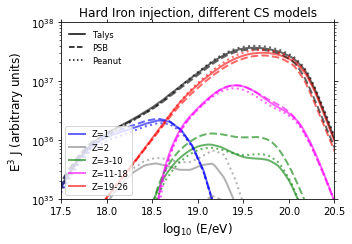

In [37]:
from prince.util import get_AZN, PRINCE_UNITS
plt.figure(figsize=(5,3.5))

z = lambda el: get_AZN(el)[1]
energy, spectrum = solver_penaut.res.get_solution_group(
    [el for el in solver_penaut.spec_man.known_species[::] if el >= 200])
norm = 4e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
alpha = .6

for eg, ls in zip([solver_talys,solver_PSB, solver_penaut],['solid','dashed', 'dotted', '-.']):
    
#     energy, spectrum = eg.get_solution_group(
#         [el for el in eg.prince_run.spec_man.known_species[::] if el >= 200])
#     norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
    
    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if z(el) == 1 and el >=100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=1', c='b')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if z(el) == 2 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=2', c='grey')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if 3 <= z(el) <= 10 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=3-10', c='g')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::] if 11 <= z(el) <= 18 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=11-18',c='magenta')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::] if 19 <= z(el) <= 26 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=19-26',c='r')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.spec_man.known_species[::]  if el >= 100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, c='k')

    
#custom legend
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
display = (0,1,2,3,4)

#Create custom artists
legend_talys = plt.Line2D((0,1),(0,0), color='k', linestyle='solid')
legend_PSB = plt.Line2D((0,1),(0,0), color='k', linestyle='dashed')
legend_penaut = plt.Line2D((0,1),(0,0), color='k', linestyle='dotted')

#Create legend from custom artist/label lists
# ax.legend([handle for i,handle in enumerate(handles) if i in display]+[legend_gilmore,legend_dominguez],
#           [label for i,label in enumerate(labels) if i in display]+['Talys', 'PSB', 'peanut'])

leg2 =  ax.legend([handle for i,handle in enumerate(handles) if i in display],
           [label for i,label in enumerate(labels) if i in display],
                  ncol = 1, loc = 'lower left', fontsize = 'small')
ax.legend([legend_talys,legend_PSB,legend_penaut],['Talys', 'PSB', 'Peanut'], 
          frameon=False, fontsize = 'small')
ax.add_artist(leg2)

plt.semilogy()
# plt.legend(ncol=1, loc='upper left')
plt.tick_params(axis='both',top=True,right=True,which='both')
plt.xlim(17.5,20.5)
plt.ylim(1e35,1e38)
# plt.grid()
plt.ylabel('E$^3$ J (arbitrary units)', fontsize = 'large')
plt.xlabel('log$_{10}$ (E/eV)', fontsize = 'large')
plt.title('Hard Iron injection, different CS models')
plt.tight_layout()

### Hard Nitrogen

In [38]:
source_hard_nitro = RigdityCutoffSource(prince_run_talys, params={1407:(1.0, 5e9,  1.0)}, norm=1e-87)

solver_talys = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run_talys,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_talys.add_source_class(source_hard_nitro)
solver_talys.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)
/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 15.895956039428711 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 73.52588677406311 s


In [39]:
source_hard_nitro = RigdityCutoffSource(prince_run_PSB, params={1407:(1.0, 5e9,  1.0)}, norm=1e-87)

solver_PSB = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run_PSB,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_PSB.add_source_class(source_hard_nitro)
solver_PSB.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 7.258111238479614 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 43.84076714515686 s


In [40]:
source_hard_nitro = RigdityCutoffSource(prince_run_peanut, params={1407:(1.0, 5e9,  1.0)}, norm=1e-87)

solver_penaut = UHECRPropagationSolverBDF(initial_z=1., final_z = 0.,prince_run=prince_run_peanut,
                                   enable_pairprod_losses = True, enable_adiabatic_losses = True,
                                   enable_injection_jacobian = True, enable_partial_diff_jacobian=True)
solver_penaut.add_source_class(source_hard_nitro)
solver_penaut.solve(dz=1e-3,verbose=False,full_reset=False)

UHECRPropagationSolverBDF::solve(): Setting up Solver


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Solver initialized in 16.74664831161499 s
UHECRPropagationSolverBDF::solve(): Starting integration.


/home/jheinze/python_packages/PriNCe/prince/photonfields.py:122: RuntimeWarning: overflow encountered in exp
  nlocal = pref * Ered**2 / (np.exp(Ered / E_CMB) - 1.0)


UHECRPropagationSolverBDF::solve(): Integration completed in 70.85797047615051 s


/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value encountered in log
  np.log(curr_spec),
/home/jheinze/python_packages/PriNCe/prince/solvers.py:118: RuntimeWarning: invalid value 

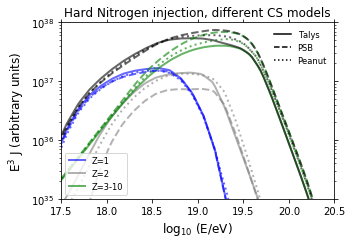

In [41]:
from prince.util import get_AZN, PRINCE_UNITS
plt.figure(figsize=(5,3.5))

z = lambda el: get_AZN(el)[1]
energy, spectrum = solver_penaut.res.get_solution_group(
    [el for el in solver_penaut.spec_man.known_species[::] if el >= 200])
norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
alpha = .6

for eg, ls in zip([solver_talys,solver_PSB, solver_penaut],['solid','dashed', 'dotted', '-.']):
    
#     energy, spectrum = eg.get_solution_group(
#         [el for el in eg.prince_run.spec_man.known_species[::] if el >= 200])
#     norm = 6e37/np.max(spectrum[(1e10 < energy) & (energy< 1e11)])
    
    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::] if z(el) == 1 and el >=100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=1', c='b')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::] if z(el) == 2 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=2', c='grey')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::] if 3 <= z(el) <= 10 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=3-10', c='g')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::] if 11 <= z(el) <= 18 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=11-18',c='magenta')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::] if 19 <= z(el) <= 26 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, label='Z=19-26',c='r')

    energy, spectrum = eg.res.get_solution_group(
        [el for el in eg.prince_run.spec_man.known_species[::]  if el >= 100 ])
    l = plt.plot(np.log10(1e9*energy), norm* spectrum, ls=ls, lw=2., alpha = alpha, c='k')

    
#custom legend
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)

#Create custom artists
legend_talys = plt.Line2D((0,1),(0,0), color='k', linestyle='solid')
legend_PSB = plt.Line2D((0,1),(0,0), color='k', linestyle='dashed')
legend_penaut = plt.Line2D((0,1),(0,0), color='k', linestyle='dotted')

#Create legend from custom artist/label lists
# ax.legend([handle for i,handle in enumerate(handles) if i in display]+[legend_gilmore,legend_dominguez],
#           [label for i,label in enumerate(labels) if i in display]+['Talys', 'PSB', 'peanut'])

leg2 =  ax.legend([handle for i,handle in enumerate(handles) if i in display],
           [label for i,label in enumerate(labels) if i in display],
                  ncol = 1, loc = 'lower left', fontsize = 'small')
ax.legend([legend_talys,legend_PSB,legend_penaut],['Talys', 'PSB', 'Peanut'], 
          frameon=False, fontsize = 'small')
ax.add_artist(leg2)

plt.semilogy()
# plt.legend(ncol=1, loc='upper left')
plt.tick_params(axis='both',top=True,right=True,which='both')
plt.xlim(17.5,20.5)
plt.ylim(1e35,1e38)
# plt.grid()
plt.ylabel('E$^3$ J (arbitrary units)', fontsize = 'large')
plt.xlabel('log$_{10}$ (E/eV)', fontsize = 'large')
plt.title('Hard Nitrogen injection, different CS models')
plt.tight_layout()